# Programação Reativa com Python

# De onde vem o reativo?

* Capacidade de manipular fluxos de dados(_streams_) assíncronos de forma declarativa.

* Criar _streams_ de qualquer coisa(estruturas de dados, _input_ do usuário, variáveis, etc.), não somente de eventos.

* Combinar, criar e filtrar múltiplos _streams_ 

* Exemplo: Imagine que o seu _feed_ do Twitter ou Instagram seja um _stream_, da mesma forma que qualquer evento, e você pode escutar esse _stream_ e "reagir" como queira.

# "Tudo é um _stream_"

![](./meme1.png)

**Um _stream_ é um sequência de eventos futuros ordenados no tempo, pode emitir 3 diferentes resultados:**
* Um valor(de algum tipo)
* Um erro
* Um sinal de "completo"(fim do _stream_)

Podemos capturar os eventos emitidos definindo funções que irão ser executadas quando ocorrer alguma emissão. Isso é chamado de **_subscribing_**, as funções usadas são os **_observers_** e o próprio _stream_ é o **_Observable_**.

# Reactive Extensions

![](./rx.png)

O Reactive Extensions, ou mais conhecido como **ReactiveX** ou simplesmente **Rx**, possui implementações para várias linguagens, como:
* JS
* Java
* Python
* Clojure
* Ruby
.
.
.

# Criando um _stream_

In [1]:
from rx import Observer, Observable


def create_stream(observer):
    observer.on_next("Emerson")
    observer.on_next("Silva")
    observer.on_error(Exception("Error"))
    observer.on_completed()


class PrintObserver(Observer):
    def on_next(self, value):
        print("Received {0}".format(value))

    def on_completed(self):
        print("Done!")

    def on_error(self, error):
        print("Error Occurred: {0}".format(error))


stream = Observable.create(create_stream)

subscription = stream.subscribe(PrintObserver())
subscription.dispose()

Received Emerson
Received Silva
Error Occurred: Error


# De uma forma mais simples...

In [2]:
stream = Observable.from_(["Emerson", "Silva", Exception("Error")])

subscription = stream.subscribe(on_next=lambda value: print(f"Received {value}"),
                               on_error=lambda error: print(f"Error Occurred: {error}"),
                               on_completed=lambda:print("Done!"))
subscription.dispose()

Received Emerson
Received Silva
Received Error
Done!


# Tipos de _Observables_

* "Hot" observables: começam a emitir items assim que são criados

* "Cold" observables: começam a emitir items somente quando é acionado _subscribe_ 

# Compondo _streams_ com operadores

O **ReactiveX** possui mais de 100 operadores, que ajudam na composição dos _streams_. Eles são dividos em várias classes:
* Criação(`from_`, `of`, `interval`,...)
* Transformação(`map`, `buffer`, `flat_map` ❤, ...)
* Filtragem(`filter`, `take`, `debounce`, ...)
* Combinação(`zip`, `combine_latest`, `start_with`, ...)
* Tratamento de Erros(`catch`, `retry`) ...

_ps_: A lista completa está em: http://reactivex.io/documentation/operators.html

# Filter

![](./filter.png)

In [3]:
stream = Observable.from_([{'name': 'Newton', 'country': 'England'},
                           {'name': 'Einstein', 'country': 'Germany'},
                           {'name': 'Heisenberg', 'country': 'Germany'}])

subscription = stream.filter(lambda scientist: scientist['country'] == 'Germany')\
                .pluck('name')\
                .to_list()\
                .subscribe(lambda names: print(*names, sep=' and '))

subscription.dispose()

Einstein and Heisenberg


# FlatMap

![](./flatMap.png)

In [4]:
stream = Observable.range(1, 3)

subscription = stream.flat_map(lambda val: Observable.range(val, 2))\
                .subscribe(print)

subscription.dispose()

1
2
2
3
3
4


# Zip

![](./zip.png)

In [5]:
from random import randint

random_nums = Observable.range(1, 4).map(lambda val: randint(val, (val + 1) ** 2))

stream = Observable.from_(['Newton', 'Einstein', 'Heisenberg'])

subscription = stream.zip(random_nums, lambda scientist, id: (id, scientist))\
                .subscribe(print)

subscription.dispose()

(1, 'Newton')
(4, 'Einstein')
(7, 'Heisenberg')


# Buffer

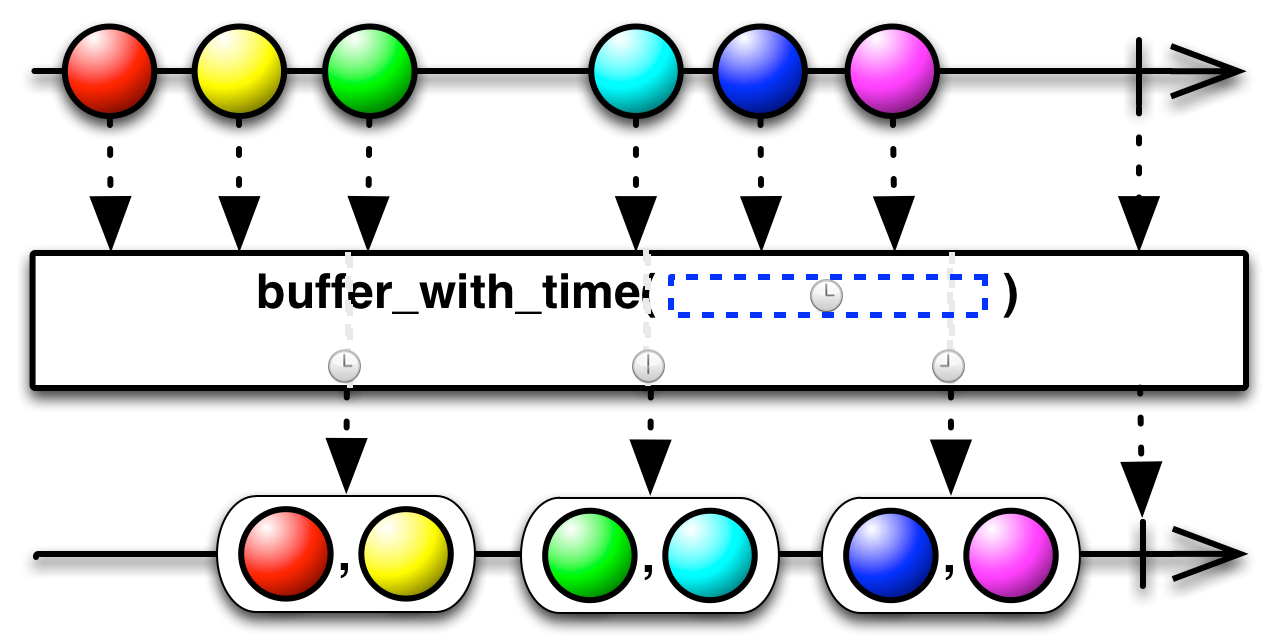

In [6]:
from rx import Observable
from rx.concurrency import ThreadPoolScheduler

In [7]:
scheduler = ThreadPoolScheduler(2)

In [8]:
times = [
    {"value": 0, "time": 100},
    {"value": 1, "time": 600},
    {"value": 2, "time": 400},
    {"value": 3, "time": 700},
    {"value": 4, "time": 200},
]

source = Observable.from_(times, scheduler=scheduler)\
            .flat_map(lambda item: Observable.of(item["value"])\
                .delay(item["time"]))


In [9]:
groups = source.buffer_with_time(300)

In [10]:
groups.subscribe(print)

# Debounce

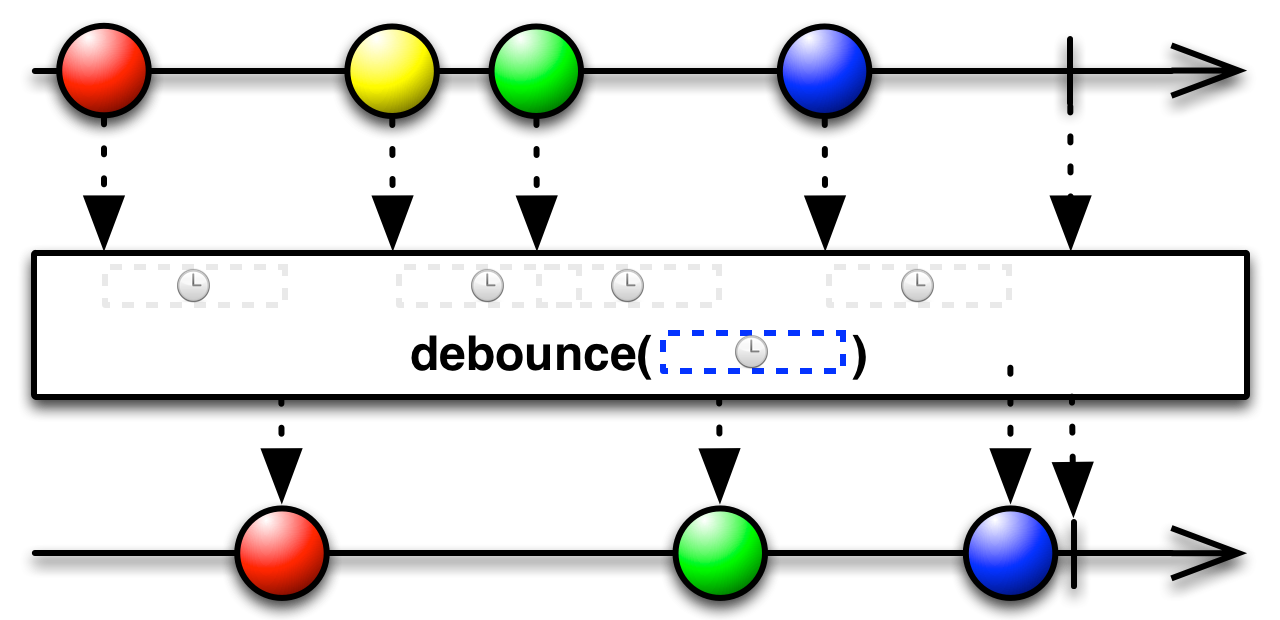

In [11]:
groups2 = source.buffer(source.debounce(150))

In [12]:
groups2.subscribe(print)

![](./meme3.png)

# Referências

* http://reactivex.io/documentation/operators.html
* https://github.com/ReactiveX/RxPY/tree/release/v1.6.x